In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import random
from shapely.geometry import Point
from shapely import contains_xy

# Import functions from functions.py
from functions import generate_random_location_within_map_domain, get_flood_depth, calculate_basic_flood_damage, floodplain_multipolygon
import networkx as nx
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from mesa import batch_run
import geopandas as gpd
import rasterio as rs
import matplotlib.pyplot as plt
# Import the agent class(es) from agents.py
from agents import Households
from agents import Government
from rbb import OrganizationInstrument

# Import functions from functions.py
from functions import get_flood_map_data, calculate_basic_flood_damage
from functions import map_domain_gdf, floodplain_gdf

from model import AdaptationModel

In [2]:
dyke = OrganizationInstrument(name = 'Dyke', cost = 8, completion_time = 5, protection_level = 0.7, status = 1)
wetland = OrganizationInstrument(name = 'Wetland', cost = 5,  completion_time = 2, protection_level = 0.4, status = 1)  
options_list = [dyke, wetland]

## Batchrunner

In [3]:
# params = {
#     "seed": 42,
#     "options_list": None,
#     "number_of_households": 100,
#     "flood_map_choice": 'harvey',
#     "network": 'watts_strogatz', #["erdos_renyi", "barabasi_albert", "watts_strogatz"],
#     "probability_of_network_connection": 0.4,
#     "number_of_edges" : 3,"number_of_nearest_neighbours" : 5,

#     "flood_probability" : 0.05,
#     "economic_status": 'neutral',
#     "intention_action_gap" : 0.3,
#     "low_threshold" : 0.6,
#     "medium_threshold" : 0.7,
#     "high_threshold" : 0.8,
#     "upper_budget_threshold" : 7000,
#     "lower_budget_threshold" : 3000,
#     "elevation_time" : 4,
#     "elevation_cost" : 5000,
#     "elevation_protection" : 0.3,
#     "elevation_effectiveness" : 1,
#     "wet_proofing_time" : 2,
#     "wet_proofing_cost" : 3000,
#     "wet_proofing_effectiveness" : 0.4,
#     "dry_proofing_time" : 1,
#     "dry_proofing_cost" : 1500,
#     "dry_proofing_protection" : 1,
#     "dry_proofing_effectiveness" : 0.85,
#     "max_damage_costs" : 5000,
#     "flood_risk_threshold": 1.5,
#     "public_concern_threshold": 0.6,
#     "damage_threshold": 0.3,
#     "high_risk_bound": 2.9,
#     "lower_risk_bound": 1.9,
#     "gov_detector": 0,
#     "gov_structure": 'centralised',
#           }

# results = batch_run(
#     AdaptationModel,
#     parameters=params,
#     iterations=5,
#     max_steps=120,
#     number_processes=1,
#     data_collection_period=1,
#     display_progress=True,
# )

  0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
# complete_df = pd.DataFrame(results)
# subset_df = complete_df[['iteration', 'Step', 'seed', 
#                            'options_list', 'number_of_households', 
#                            'Average Adaptation Motivation', 'Flood', 'Average flood damage', 
#                            'total_adapted_households', 'total_decisions_to_adapt']]
# df_no_agent = subset_df.drop_duplicates().reset_index().drop(columns=['index'])

In [5]:
#df_no_agent.to_csv('dataframes/df_basecase_n5_fixedseed42_new.csv')

In [8]:
def plot_KPI(df, kpi, c = 'blue', n_iterations = 5):
    g = sns.FacetGrid(df, col_wrap = n_iterations, col = 'iteration')
    g.fig.suptitle(kpi.capitalize() + " in basecase for different iterations")
    g.map(sns.lineplot,x = df['Step'], y= df[kpi], color = c, label = kpi)
    plt.legend()
    g.set_axis_labels(x_var = "Timestep", y_var = kpi)
    g.set(xticks = list(range(0, 121, 20)))
    plt.savefig(f"figures/Reproducability_{kpi}_n5_fixedseed42.png", dpi=100, bbox_inches='tight')
    plt.show()

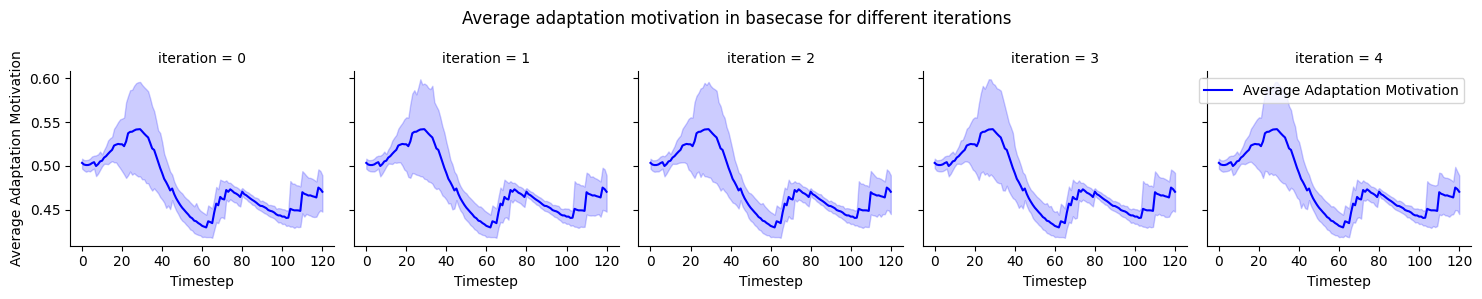

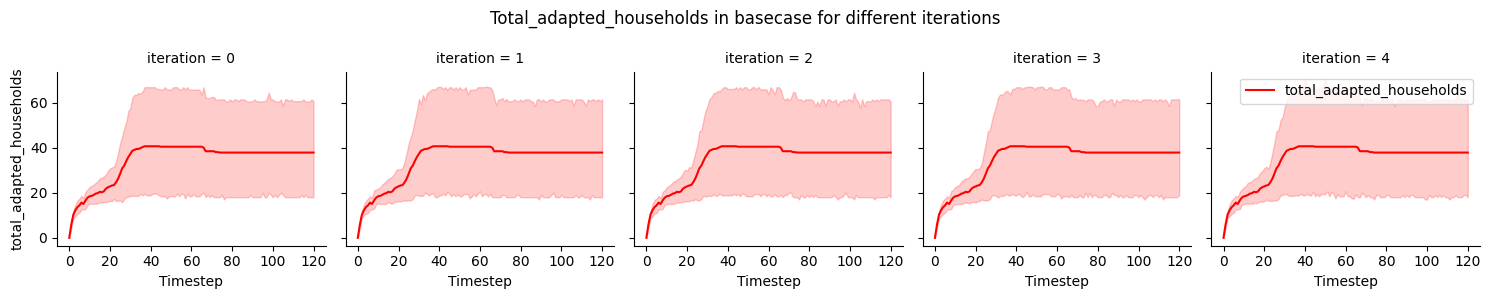

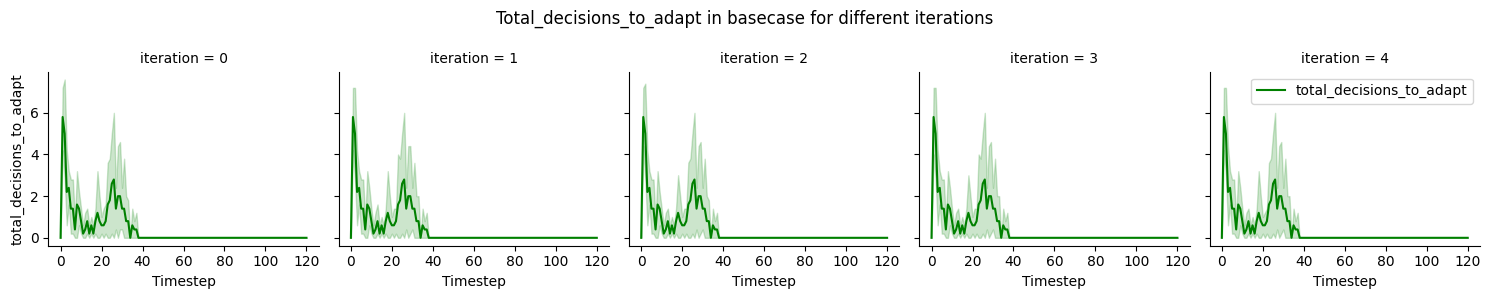

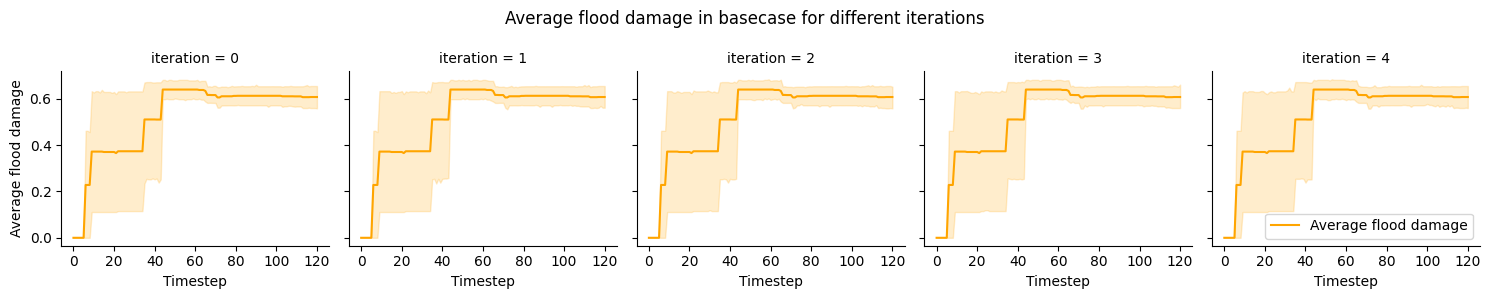

In [9]:
KPIs = ['Average Adaptation Motivation', 'total_adapted_households', 'total_decisions_to_adapt', 'Average flood damage']
colors = ['blue', 'red', 'green', 'orange']

for i in range(len(KPIs)):
    plot_KPI(df_no_agent, KPIs[i], c = colors[i], n_iterations = 5)